In [12]:
import pandas as pd
import os   
import seaborn as sns 
import glob
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('clean_data/CommodityWiseImports.csv')
data['Vol (Imports)'] = data['Vol (Imports)']/1000
data.sort_values(by=['Year'])

,Unnamed: 0,HSCode,Year,Commodity,Vol (Imports),Gowth
865,865,99,2018,MISCELLANEOUS GOODS.,0.00003,-97.69
794,794,27,2018,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1.04732,4.27
795,795,28,2018,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,1.05024,57.44
796,796,29,2018,ORGANIC CHEMICALS,8.59628,21.22
797,797,30,2018,PHARMACEUTICAL PRODUCTS,0.14837,16.81
...,...,...,...,...,...,...
740,740,70,2025,GLASS AND GLASSWARE.,0.65759,NaN
741,741,71,2025,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",0.07676,NaN
742,742,72,2025,IRON AND STEEL,0.68445,NaN
768,768,99,2025,MISCELLANEOUS GOODS.,0.00001,NaN


In [3]:
data_full = data.groupby(['HSCode', 'Year']).sum()
data_full

Unnamed: 0                   Commodity  Vol (Imports)    Gowth
HSCode Year                                                                
1      2018         769               LIVE ANIMALS.        0.00000   -99.80
       2019         192  LIVE ANIMALS.LIVE ANIMALS.        0.00006  5804.52
       2020          96               LIVE ANIMALS.        0.00005   454.97
       2021         288               LIVE ANIMALS.        0.00000   -98.73
       2022         383               LIVE ANIMALS.        0.00006  9123.98
...                 ...                         ...            ...      ...
99     2021         382        MISCELLANEOUS GOODS.        0.00012    49.58
       2022         478        MISCELLANEOUS GOODS.        0.00006   -44.19
       2023         574        MISCELLANEOUS GOODS.        0.00006    -6.18
       2024         671        MISCELLANEOUS GOODS.        0.00003   -56.28
       2025         768        MISCELLANEOUS GOODS.        0.00001     0.00

[770 rows x 4 columns]

In [4]:
top5 = data_full.sort_values(['Year', 'Vol (Imports)'], ascending=[True, False]).groupby('Year').head(5).reset_index()
years = sorted(top5['Year'].unique())
hscodes = top5['HSCode'].unique()

In [5]:
top5

,HSCode,Year,Unnamed: 0,Commodity,Vol (Imports),Gowth
0,85,2018,851,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,20.62759,-28.06
1,84,2018,850,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",13.38381,-1.15
2,29,2018,796,ORGANIC CHEMICALS,8.59628,21.22
3,39,2018,806,PLASTIC AND ARTICLES THEREOF.,2.72261,15.10
4,31,2018,798,FERTILISERS.,2.05322,91.51
5,85,2019,354,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,39.43272,-7.39
6,84,2019,352,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",27.30977,-0.46
7,29,2019,244,ORGANIC CHEMICALSORGANIC CHEMICALS,16.94473,-7.28
8,39,2019,264,PLASTIC AND ARTICLES THEREOF.PLASTIC AND ARTIC...,5.24537,-0.29
9,31,2019,248,FERTILISERS.FERTILISERS.,3.37211,-11.32


/tmp/ipykernel_646645/2547994110.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(years, fontsize=12, fontweight='bold')


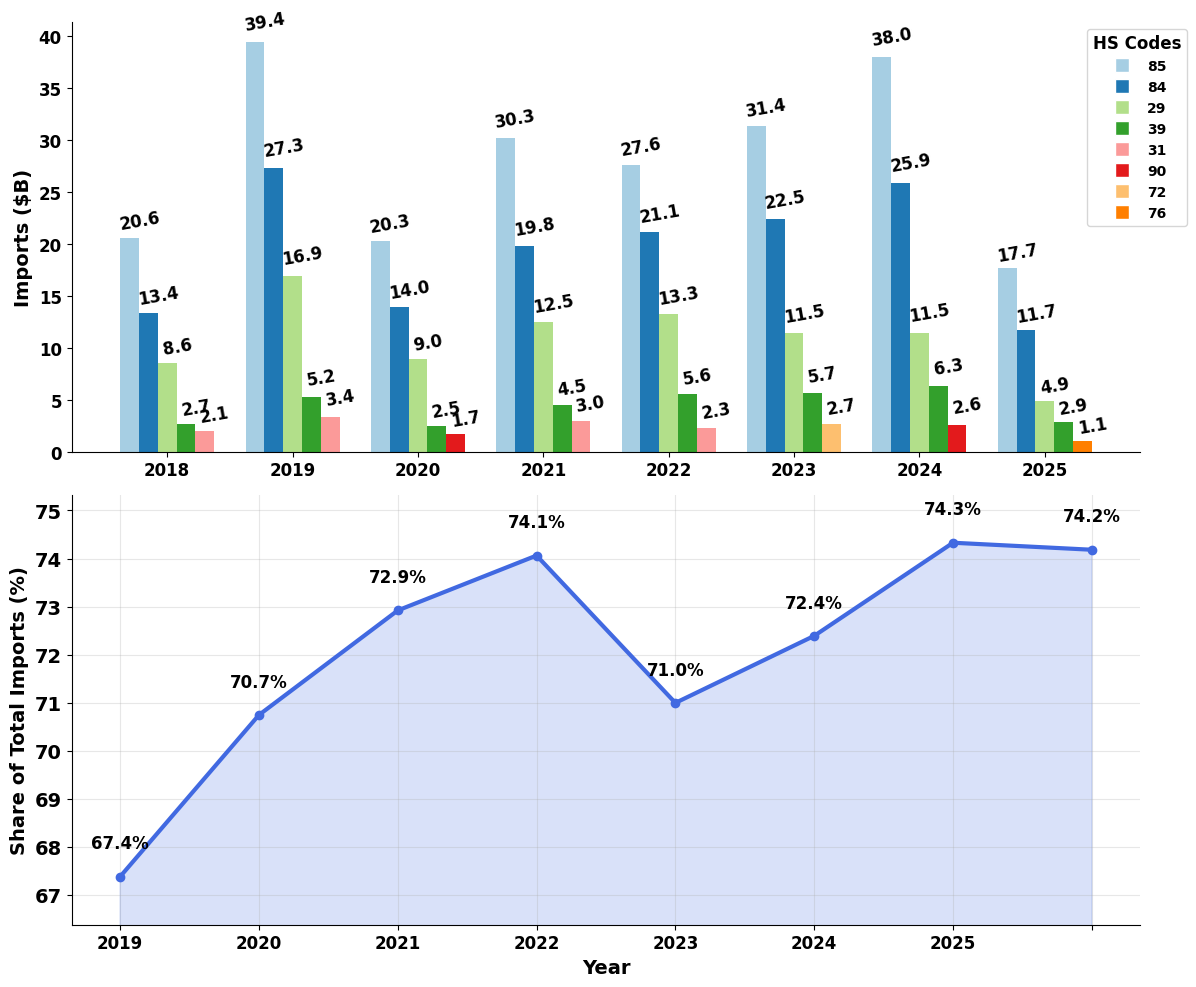

In [33]:
# Commodity wise Analysis


# Use a consistent color palette
colors = dict(zip(hscodes, plt.cm.Paired.colors[:len(hscodes)]))
bar_width = 0.15
x = np.arange(len(years))

# --- Figure setup: 1 row, 2 columns ---
fig = plt.figure(figsize=(12,10))
plt.rcParams['font.weight'] = 'bold'

gs = fig.add_gridspec(2, 1)
ax1 = fig.add_subplot(gs[0, 0])  # Left subplot (Top 5 Shares per Year)
ax2 = fig.add_subplot(gs[1, 0])  # Right subplot (Top 5 % of total imports)

# --- Left subplot: Top 5 Shares per Year ---
for idx, year in enumerate(years):
    year_data = top5[top5['Year'] == year]
    year_hscodes = year_data['HSCode'].values
    shares = year_data['Vol (Imports)'].values

    for i, (hs, share) in enumerate(zip(year_hscodes, shares)):
        ax1.bar(idx + i * bar_width, share, width=bar_width, color=colors[hs])
        ax1.text(idx + i * bar_width + 0.08, share + max(shares)*0.02,
                 f'{share:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold', rotation=10)

ax1.set_ylabel('Imports ($B)', fontsize=14, fontweight='bold')
ax1.set_xticks(x + bar_width * 2)
ax1.set_xticklabels(years, fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# --- Compute total imports per year (from full dataset) ---
total_imports = data_full.groupby('Year')['Vol (Imports)'].sum().to_dict()

# --- Compute total imports of top 5 HS codes per year ---
top5_imports = top5.groupby('Year')['Vol (Imports)'].sum().to_dict()

# --- Calculate percentage share of top 5 relative to total imports ---
share_percentages = {year: (top5_imports[year] / total_imports[year]) * 100 for year in years}

# --- Prepare data for plotting ---
sorted_years = sorted(share_percentages.keys())
shares = [share_percentages[yr] for yr in sorted_years]

# --- Right subplot: Share of Total Imports (%) ---
ax2.plot(sorted_years, shares, marker='o', linewidth=3, color='royalblue')
ax2.fill_between(sorted_years, shares, color='royalblue', alpha=0.2)

# Annotate each point with percentage
for year, share in zip(sorted_years, shares):
    ax2.text(year, share + 0.5, f'{share:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax2.set_xlabel('Year', fontsize=14, fontweight='bold')
ax2.set_ylabel('Share of Total Imports (%)', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14,)
ax2.set_xticklabels(years, fontsize=12, fontweight='bold')
ax2.set_ylim(min(shares) - 1, max(shares) + 1)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(alpha=0.3)



# --- Shared legend for HS codes ---
handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=colors[c], markersize=10) for c in hscodes]
ax1.legend(handles, hscodes, title='HS Codes', title_fontsize=12, fontsize=10,
           loc='upper right', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.savefig('images/Top5_HSCode_Import_Shares.png', dpi=1200)
plt.show()


In [7]:
data_folder = "clean_data/"
all_files = glob.glob(os.path.join(data_folder, "CountryWiseImports_HSCode*.csv"))

# Combine all CSVs into a single DataFrame
df_list = [pd.read_csv(f) for f in all_files]
all_data = pd.concat(df_list, ignore_index=True)
all_data


,Country,HSCode,Year,Value(Imports),Growth
0,AFGHANISTAN,HSCode_29,2019,4.18,-41.52
1,ALBANIA,HSCode_29,2019,0.32,-62.19
2,ALGERIA,HSCode_29,2019,36.30,-35.77
3,ANGOLA,HSCode_29,2019,0.93,-41.72
4,ANTIGUA,HSCode_29,2019,0.00,NaN
...,...,...,...,...,...
10483,UZBEKISTAN,HSCode_31,2018,0.00,24.98
10484,VIETNAM SOC REP,HSCode_31,2018,3.74,16.69
10485,YEMEN REPUBLC,HSCode_31,2018,0.01,-98.09
10486,ZAMBIA,HSCode_31,2018,0.65,-63.89


In [8]:
hscode_year = all_data.groupby(by=['HSCode','Year'])['Value(Imports)'].sum().reset_index()
hscode_year['Region'] = 'World'
hscode_year.head(2)

,HSCode,Year,Value(Imports),Region
0,HSCode_29,2018,36479.20,World
1,HSCode_29,2019,17487.25,World


In [9]:
china_data = all_data[all_data['Country'] == 'CHINA P RP'].copy()
hscode_year_china = china_data.groupby(by=['HSCode','Year'])['Value(Imports)'].sum().reset_index()
hscode_year_china['Region'] = 'China'
hscode_year_china.head(2)

,HSCode,Year,Value(Imports),Region
0,HSCode_29,2018,6498.46,China
1,HSCode_29,2019,2702.46,China


In [10]:
merged = pd.merge(hscode_year_china, hscode_year,  on=['HSCode', 'Year'], suffixes=('_China', '_World'))
merged['Ratio'] = merged['Value(Imports)_China'] / merged['Value(Imports)_World']
merged.head(5)

,HSCode,Year,Value(Imports)_China,Region_China,Value(Imports)_World,Region_World,Ratio
0,HSCode_29,2018,6498.46,China,36479.20,World,0.178142
1,HSCode_29,2019,2702.46,China,17487.25,World,0.154539
2,HSCode_29,2020,2416.37,China,17949.66,World,0.134619
3,HSCode_29,2021,2380.27,China,22048.80,World,0.107955
4,HSCode_29,2022,1513.66,China,21377.36,World,0.070807


/tmp/ipykernel_1026845/3653786526.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


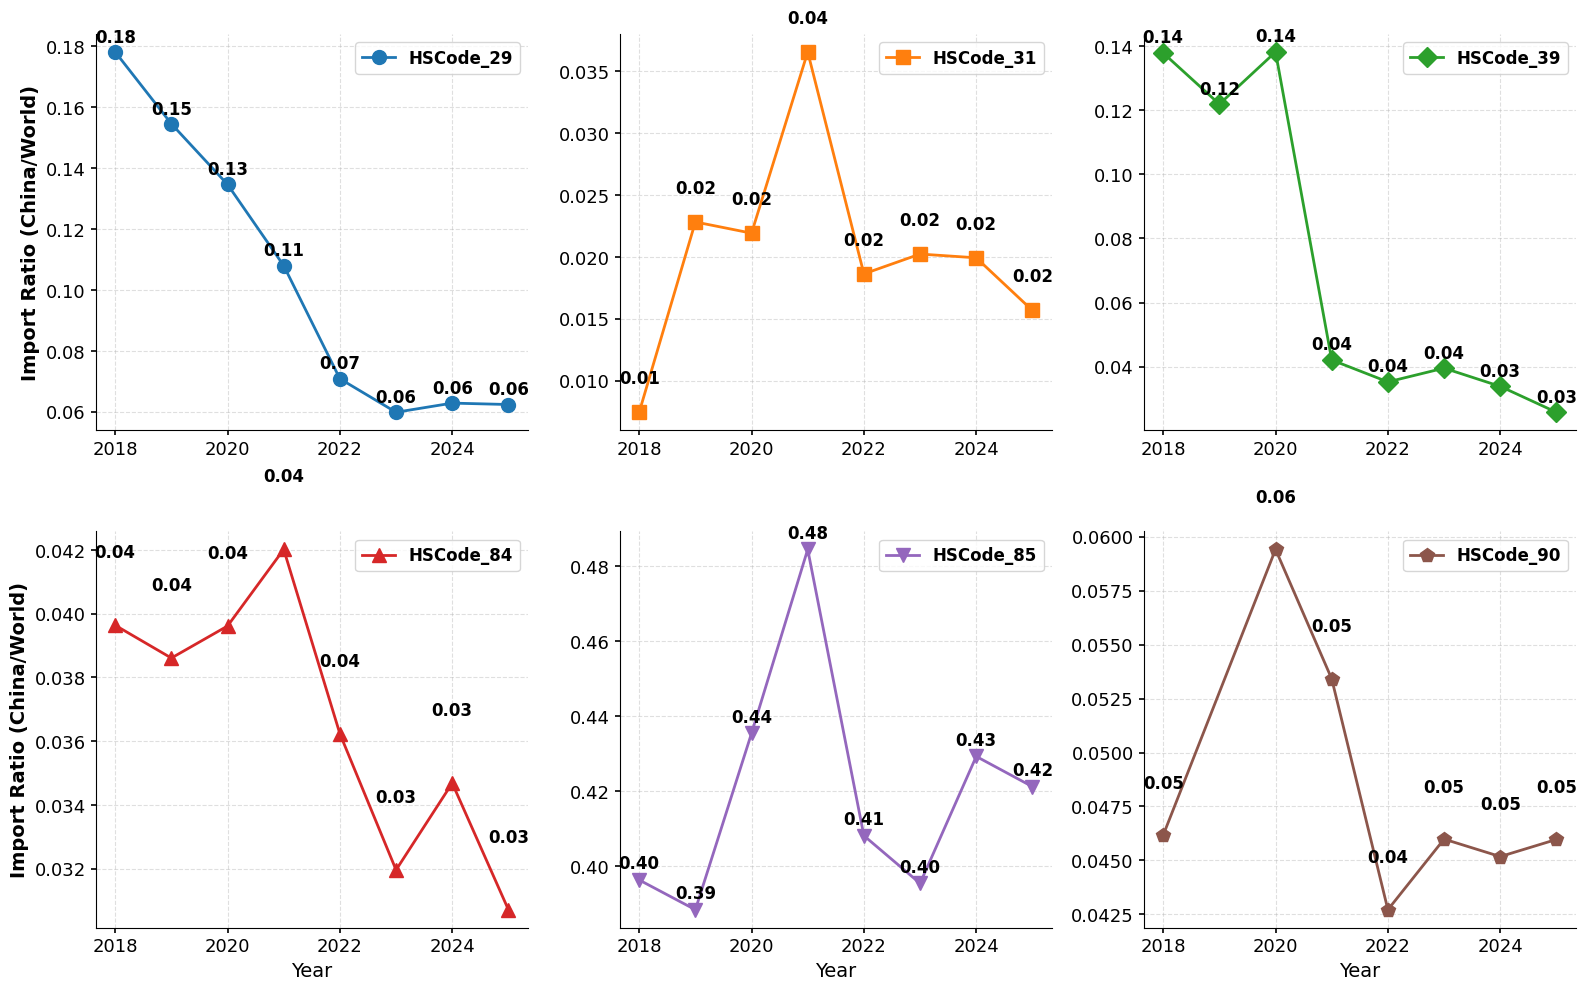

In [13]:
# Commodity wise treand Analysis# Prepare
hscodes = merged['HSCode'].unique()
n = len(hscodes)
cols = 3
rows = math.ceil(n / cols)
colors = plt.cm.tab10.colors
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'X', '<', '>']  # distinct markers

# --- Figure ---
fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows), constrained_layout=True)
axes = axes.flatten()
plt.rcParams['font.weight'] = 'bold'
# --- Plot each HSCode ---
for i, hscode in enumerate(hscodes):
    ax = axes[i]
    group = merged[merged['HSCode'] == hscode].sort_values('Year')

    ax.plot(group['Year'], group['Ratio'],
            marker=markers[i % len(markers)], markersize=10,
            linewidth=2, color=colors[i % len(colors)], label=f'{hscode}') # Changed label here

    # Annotate points
    for x, y in zip(group['Year'], group['Ratio']):
        ax.text(x, y + 0.002, f'{y:.2f}', ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='black')

    # Styling
    ax.tick_params(axis='both', labelsize=13, width=1.2,)  # make ticks bold
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(fontsize=12, loc='best',
              frameon=True, ncol=1)

# --- Clean empty subplots ---
for r in range(rows):
    for c in range(cols):
        idx = r * cols + c
        if idx >= n:
            fig.delaxes(axes[idx])
            continue
        ax = axes[idx]
        if r == rows - 1:
            ax.set_xlabel('Year', fontsize=14)
        else:
            ax.set_xlabel('')
        if c == 0:
            ax.set_ylabel('Import Ratio (China/World)', fontsize=14, fontweight='bold')
        else:
            ax.set_ylabel('')

plt.tight_layout()
plt.savefig('images/HSCode_Import_Ratio_Analysis.png', dpi=1200)

In [34]:
shares

[67.38304794834671,
 70.74620802771456,
 72.92111112883104,
 74.06308835044314,
 70.99756105608049,
 72.39221657917037,
 74.3292816167917,
 74.18343871776415]